# Plot from xy1002

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import datetime
import zipfile
import statsmodels.api as sm 
import statsmodels.formula.api as smf


if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
# Download data from new york open data
!curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'
os.system("mv rows.csv " + os.getenv("PUIDATA")) 
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + '/' + 'rows.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3110k    0 3110k    0     0  5510k      0 --:--:-- --:--:-- --:--:-- 8544k


In [48]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [49]:
# select columns
nrg1 = nrg[['NYC Borough, Block, and Lot (BBL)', 'Zip Code', 'Site EUI(kBtu/ft2)',\
            'DOF Property Floor Area (Buildngs and Parking)(ft2)', 'Reported Property Floor Area (Building(s)) (ft²)',\
            'DOF Number of Buildings', 'ENERGY STAR Score']]

nrg1.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
nrg1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,BBL,Zip Code,Site EUI(kBtu/ft2),DOF Property Floor Area (Buildngs and Parking)(ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,ENERGY STAR Score
Record Number,,,,,,,
12086,1.000410e+09,NaN,NaN,NaN,918919,NaN,Not Available
14354,4.021460e+09,11375.0,NaN,82730.0,NaN,1.0,NaN
12150,2.027620e+09,NaN,NaN,NaN,64200,NaN,Not Available
12590,1.006700e+09,10001.0,NaN,440360.0,NaN,1.0,NaN
15591,2.048300e+09,NaN,NaN,NaN,50000,NaN,Not Available


In [53]:
nrg1['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg1['Site EUI(kBtu/ft2)'], errors = 'coerce')
nrg1['Reported Property Floor Area (Building(s)) (ft²)'] = \
                         pd.to_numeric(nrg1['Reported Property Floor Area (Building(s)) (ft²)'], errors = 'coerce')


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [54]:
nrg1['energy'] = nrg1['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)*\
                    nrg1['Site EUI(kBtu/ft2)']


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
#convert eneergy consumption from kBtu to kwh.
nrg1['energy(kwh)'] = nrg1['energy'] * 0.2930710702

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
nrg1['ENERGY STAR Score'] = pd.to_numeric(nrg1['ENERGY STAR Score'], errors = 'coerce')


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


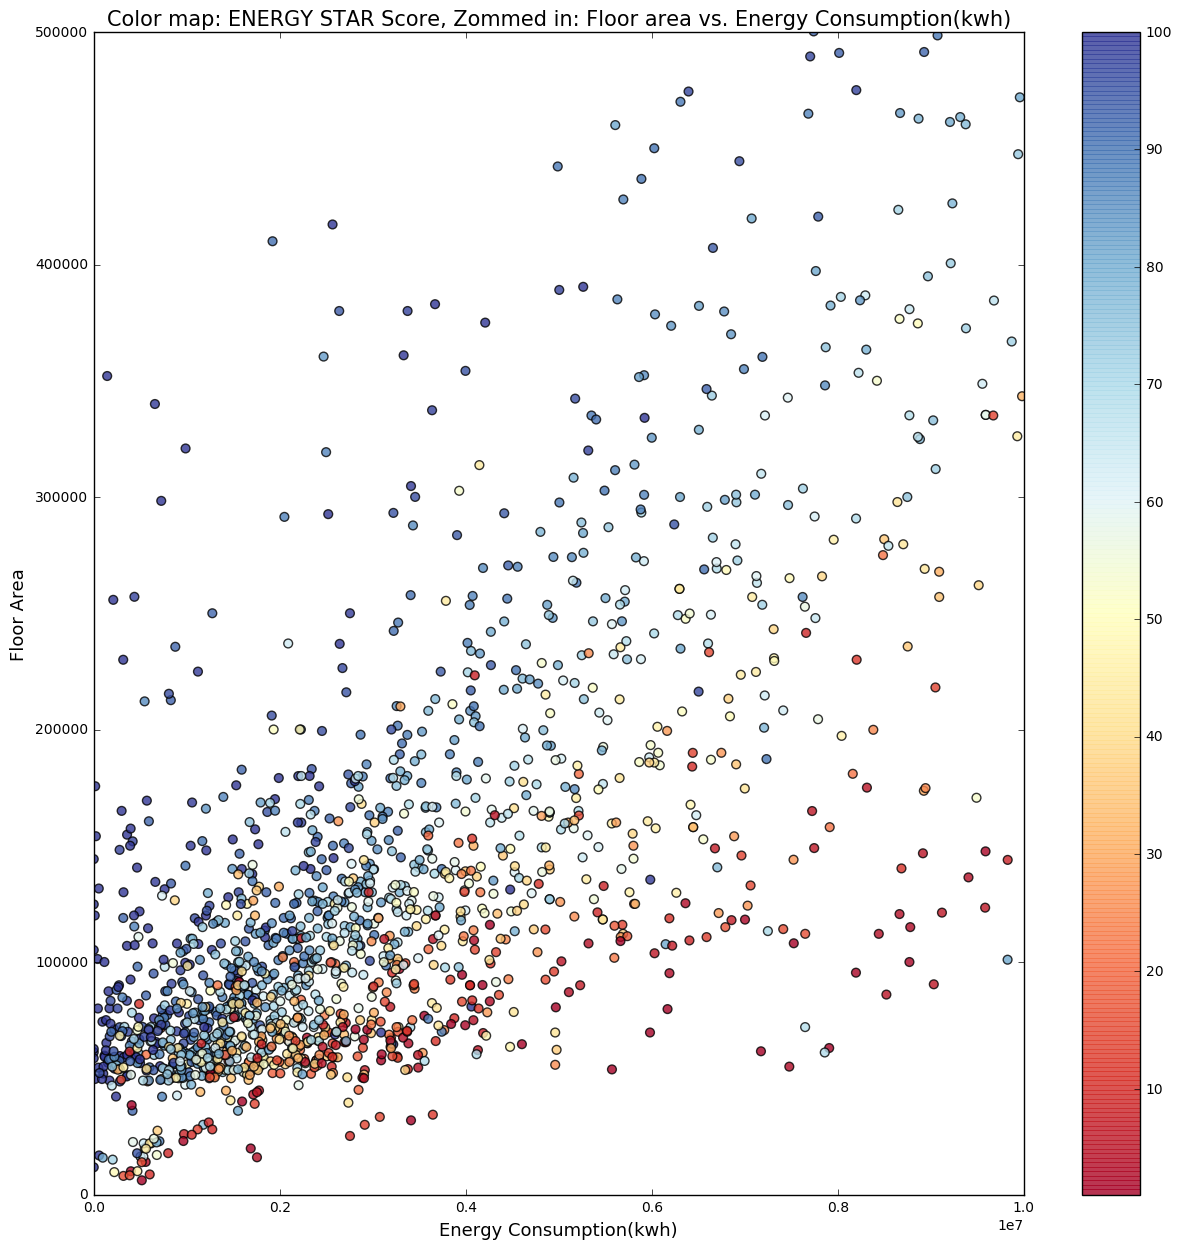

In [58]:
#plot zoomed in data so we can get a clear vision. 
pl.figure(figsize=(15,15))
pl.xlim (0, 1e7)
pl.ylim (0, 500000)
cm_s = plt.cm.get_cmap('RdYlBu')
#nrg1.plot(kind='scatter',x='energy(kwh)',y='Reported Property Floor Area (Building(s)) (ft²)', figsize=(10,10),
mp = pl.scatter(nrg1['energy(kwh)'], nrg1['Reported Property Floor Area (Building(s)) (ft²)'],
           c = nrg1['ENERGY STAR Score'], cmap = cm_s, s = 40, alpha = 0.8)
pl.colorbar(mp)
pl.xlabel('Energy Consumption(kwh)', fontsize = 13)
pl.ylabel('Floor Area', fontsize = 13)
pl.title('Color map: ENERGY STAR Score, Zommed in: Floor area vs. Energy Consumption(kwh)', \
         fontsize = 15)

**Figure 1: This figure is a zommed in scatter plot of Floor area(0~500000 (ft2)) vs. Energy Consumption(kwh)(0~1e7), colormap shows the ENERGY STAR SCORE. From which we can see that for the same energy consumption, the larger building it is, the higher score they get.**